In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

    Unnamed: 0                  boat
0            0  (182, 104, 213, 134)
1            1  (212, 107, 243, 137)
2            2  (230, 113, 261, 143)
3            3  (242, 116, 273, 146)
4            4  (259, 124, 290, 154)
5            5  (267, 128, 298, 158)
6            6  (250, 118, 281, 148)
7            7  (237, 113, 268, 143)
8            8  (238, 113, 269, 143)
9            9  (254, 121, 285, 151)
10          10  (266, 127, 297, 157)
11          11  (277, 134, 308, 164)
12          12  (291, 145, 322, 175)
13          13  (338, 228, 369, 258)
14          14  (302, 159, 333, 189)
15          15  (313, 174, 344, 204)
16          16     (5, 549, 36, 579)
17          17  (132, 549, 163, 579)
18          18  (321, 189, 352, 219)


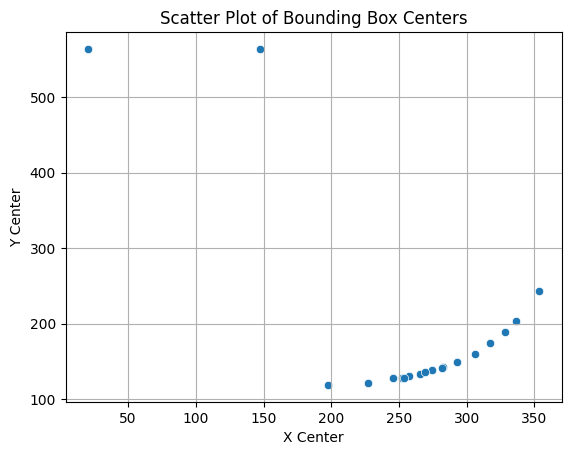

In [10]:

df_boat = pd.read_csv("/media/scripter/share_1TB/Work/Corsairs-bot/boat_positions.csv")

print(df_boat)


# Extract bounding box centers
def extract_center(box_str):

    numbers = list(map(int, re.findall(r'\d+', box_str)))

    # Calculate center coordinates
    x_center = (numbers[0] + numbers[2]) / 2
    y_center = (numbers[1] + numbers[3]) / 2
    return pd.Series([x_center, y_center])



df_boat[['x_center', 'y_center']] = df_boat['boat'].apply(extract_center)


# Create scatter plot using Seaborn
sns.scatterplot(x='x_center', y='y_center', data=df_boat)


# Show the plot
plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Scatter Plot of Bounding Box Centers')
plt.grid(True)
plt.show()

    Unnamed: 0            cannonball
0            0  (188, 573, 204, 589)
1            1  (198, 553, 214, 569)
2            2  (226, 256, 242, 272)
3            3  (186, 574, 202, 590)
4            4  (199, 551, 215, 567)
5            5  (238, 252, 254, 268)
6            6  (186, 574, 202, 590)
7            7  (199, 551, 215, 567)
8            8  (247, 249, 263, 265)
9            9  (186, 574, 202, 590)
10          10  (199, 551, 215, 567)
11          11  (260, 244, 276, 260)
12          12  (186, 574, 202, 590)
13          13  (199, 551, 215, 567)
14          14  (266, 242, 282, 258)
15          15  (188, 573, 204, 589)
16          16  (198, 553, 214, 569)
17          17  (281, 238, 297, 254)
18          18  (188, 573, 204, 589)
19          19  (198, 553, 214, 569)
20          20  (291, 234, 307, 250)
21          21  (186, 574, 202, 590)
22          22  (199, 551, 215, 567)
23          23  (205, 238, 221, 254)
24          24  (300, 231, 316, 247)
25          25  (188, 573, 204, 589)
2

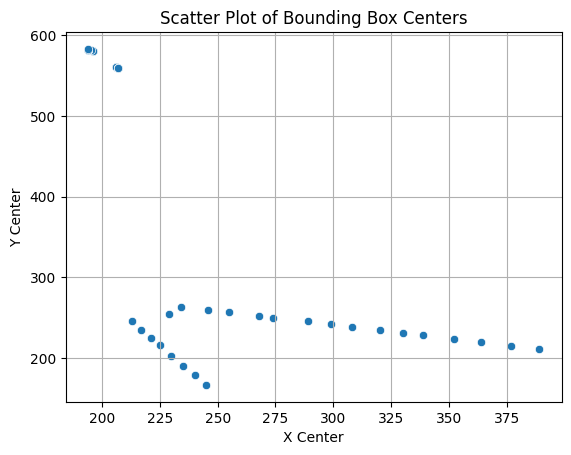

In [11]:

df_bullet = pd.read_csv("/media/scripter/share_1TB/Work/Corsairs-bot/cannonball_positions.csv")

print(df_bullet)


# Extract bounding box centers
def extract_center(box_str):

    numbers = list(map(int, re.findall(r'\d+', box_str)))

    # Calculate center coordinates
    x_center = (numbers[0] + numbers[2]) / 2
    y_center = (numbers[1] + numbers[3]) / 2
    return pd.Series([x_center, y_center])



df_bullet[['x_center', 'y_center']] = df_bullet['cannonball'].apply(extract_center)


# Create scatter plot using Seaborn
sns.scatterplot(x='x_center', y='y_center', data=df_bullet)


# Show the plot
plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Scatter Plot of Bounding Box Centers')
plt.grid(True)
plt.show()

In [12]:
df_bullet[['x_center', 'y_center']]

,x_center,y_center
0,196.0,581.0
1,206.0,561.0
2,234.0,264.0
3,194.0,582.0
4,207.0,559.0
5,246.0,260.0
6,194.0,582.0
7,207.0,559.0
8,255.0,257.0
9,194.0,582.0


In [13]:
points = df_bullet[['x_center', 'y_center']].to_numpy()


In [14]:
import itertools

In [15]:
points.shape

(53, 2)

In [17]:
min_distance = float('inf')
closest_pair = (None, None)

# Calculate pairwise L2 norms (Euclidean distances)
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        point1 = points[i]
        point2 = points[j]
        distance = np.linalg.norm(point1 - point2)  # Calculate L2 norm
        if distance < min_distance and distance > 3:
            min_distance = distance
            closest_pair = (point1, point2)

# Output the closest pair of points with the smallest non-zero distance
if closest_pair[0] is not None and closest_pair[1] is not None:
    print(f"The closest pair of points are:")
    print(f"Point 1: {closest_pair[0]}")  # Coordinates of the first point
    print(f"Point 2: {closest_pair[1]}")  # Coordinates of the second point
    print(f"Minimum Distance: {min_distance:.2f}")
else:
    print("No valid pair found.")

The closest pair of points are:
Point 1: [268. 252.]
Point 2: [274. 250.]
Minimum Distance: 6.32
